<a href="https://colab.research.google.com/github/lishav123/MLS-track-notes-/blob/main/Explainable_AI_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

According to my understanding this modules is about explaining how your algo actually works, means explaing the stuff

for example, for most people, models are just a black box which gives you some result, in explainable AI we try to explain that black box

Genreally, simple models are easy to explain but many not have high precesion and complex models may have high precsion but a bit tricty to explain it

for example, explaining the working of a Desicion tree is easy to understand than explain the work of the neural network

Let's try here with some examples

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(load_breast_cancer().data, load_breast_cancer().target, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((455, 30), (455,))

In [40]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=123, max_depth=5)
model.fit(X_train, y_train)

f"Acc: {model.score(X_test, y_test) * 100:.2f}%"

'Acc: 94.74%'

In [41]:
from sklearn.tree import export_text

tree_rules = export_text(model, feature_names=load_breast_cancer().feature_names)
print(tree_rules)

|--- mean concave points <= 0.05
|   |--- worst radius <= 16.83
|   |   |--- area error <= 48.70
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- worst smoothness >  0.18
|   |   |   |   |--- class: 0
|   |   |--- area error >  48.70
|   |   |   |--- mean smoothness <= 0.09
|   |   |   |   |--- class: 1
|   |   |   |--- mean smoothness >  0.09
|   |   |   |   |--- class: 0
|   |--- worst radius >  16.83
|   |   |--- mean texture <= 16.19
|   |   |   |--- class: 1
|   |   |--- mean texture >  16.19
|   |   |   |--- concave points error <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- concave points error >  0.01
|   |   |   |   |--- class: 1
|--- mean concave points >  0.05
|   |--- worst concave points <= 0.15
|   |   |--- worst perimeter <= 115.25
|   |   |   |--- mean texture <= 21.06
|   |   |   |   |--- class

In [42]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(16, 32, 16, 32, 16), random_state=145, max_iter=500)
model.fit(X_train, y_train)

f"Acc: {model.score(X_test, y_test) * 100:.2f}%"

'Acc: 98.25%'

# Explaining the linear models

linear models like logistic regression for binary classification and linear regression for regression problem

we explain them via their coeff, bigger coeff means that part affects the most or have more influence in the prediction

y_pred = coeff0 + x1 * coeff1 + x2 * coeff1 (depending on the data)

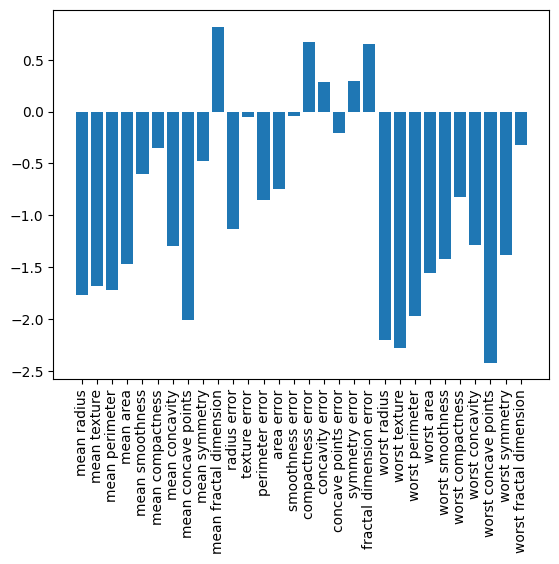

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=10000)
model.fit(MinMaxScaler().fit_transform(X_train), y_train)

plt.bar(load_breast_cancer().feature_names, model.coef_[0])
plt.xticks(rotation=90)
plt.show()

# Explain the tree models

We could do the same as the linear one for finding the importaint feature

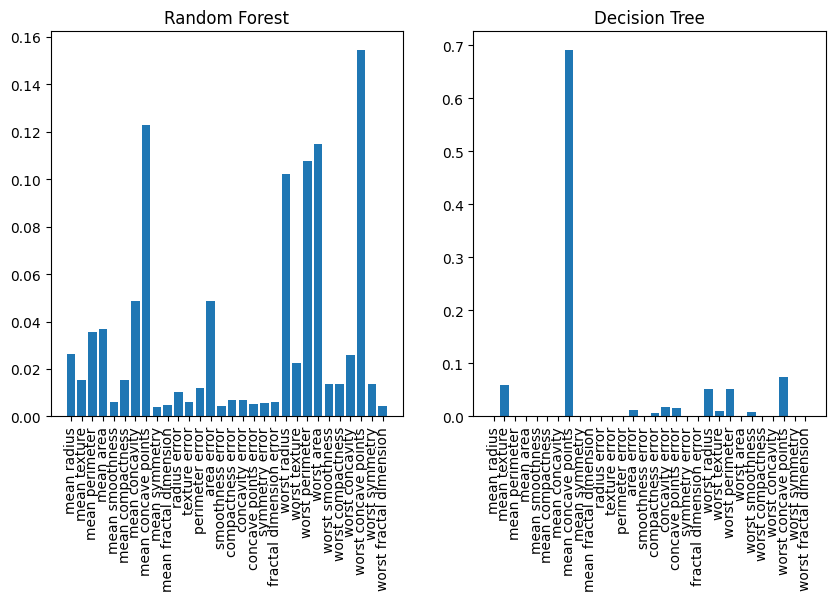

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

model_forest = RandomForestClassifier(random_state=123)
model_forest.fit(X_train_scaled, y_train)

model_tree = DecisionTreeClassifier(random_state=123)
model_tree.fit(X_train_scaled, y_train)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].bar(load_breast_cancer().feature_names, model_forest.feature_importances_)
ax[0].set_title("Random Forest")
ax[0].tick_params(axis='x', rotation=90)

ax[1].bar(load_breast_cancer().feature_names, model_tree.feature_importances_)
ax[1].set_title("Decision Tree")
ax[1].tick_params(axis='x', rotation=90)

plt.show()